In [61]:
import numpy as np 
import matplotlib.pyplot as plt 

In [88]:
# Just some helper methods

def load_data(num_samples_per_cluster=50):
    num_samples_per_cluster = num_samples_per_cluster
    mean_cluster1 = [2, 2]
    cov_cluster1 = [[1, 0.5], [0.5, 1]] 
    cluster1_samples = np.random.multivariate_normal(mean_cluster1, cov_cluster1, num_samples_per_cluster)
    mean_cluster2 = [-2, -2]
    cov_cluster2 = [[1, -0.5], [-0.5, 1]] 
    cluster2_samples = np.random.multivariate_normal(mean_cluster2, cov_cluster2, num_samples_per_cluster)
    X = np.vstack([cluster1_samples, cluster2_samples])
    np.random.shuffle(X)
    return X

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

In [89]:
X = load_data(100)
print("X.shape = ", X.shape)

X.shape =  (200, 2)


In [97]:
def find_closest_centroids(X, centroids):
    '''
    Finds the closest centroid for each example in X.
    Args:
        X: ndarray of shape (m,n) consisting of example points.
        centroids: ndarray of shape (k, n) consisting of k centroids.

    Returns:
        idx: ndarray of shape (k,) containing indices for the centroids in the range (0 - k-1) that is closest to each example point.
    '''

    idx = np.zeros((X.shape[0],))

    for i in range(X.shape[0]):
        distances = []
        for j in range(centroids.shape[0]):
            distance = np.linalg.norm(X[i] - centroids[j])
            distances.append(distance)
        
        idx[i] = np.argmin(distances)

    return idx 

In [91]:
def compute_centroids(X, idx, centroids):
    '''
    Computes the mean of the samples belonging to each centroid and re-adjusts each centroid.
    Args:
        X: ndarray of shape (m,n) consisting of example points.
        centroids: ndarray of shape (k, n) consisting of k centroids.
        idx: ndarray of shape (k,) containing indices for the centroids in the range (0 - k-1) that is closest to each example point.

    Returns:
        new_centroids: ndarray of shape (k, n) consisting of new k centroids.

    '''
    new_centroids = np.zeros(centroids.shape)

    for j in range(centroids.shape[0]):
        belonging_samples = X[idx == j]
        mean = np.mean(belonging_samples)
        new_centroids[j] = mean 

    return new_centroids

In [92]:
def init_centroids(X, k):
    '''
    Randomly initialize k centroids.
    Args:
        X: (ndarray) of shape (m,n) consisting of example points.
        k: (scalar) number of centroids.

    Returns:
    centroids: (ndarray) of shape (k,n) consisting of randomly initialized centroids.
    '''

    K = np.random.permutation(X.shape[0])
    centroids = X[K[:k]]

    return centroids

In [117]:
def compute_distortion(X, idx, centroids):
    m = X.shape[0]
    dist = 0.
    for i in range(m):
        dist += np.linalg.norm(X[i] - centroids[int(idx[i])])
    
    return dist / m

In [120]:
def run_Kmeans(X, max_iter, k):
    '''
    Kmeans algorithm, iteratively minimizes the distortion (distance between example points and their associated centroids)
    Args:
        X: (ndarray) of shape (m,n) consisting of example points.
        max_iter: (scalar) number of times to execute Kmeans.
        k: (scalar) number of centroids

    Returns:
        distortion: (scalar) quantitative measure of how well the kmeans has done its job.
        idx: (ndarray) of shape (m,n) consisting of indicies of centroids.
    '''
    
    centroids = init_centroids(X, k)
    for i in range(max_iter):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, centroids)
    
    distortion = compute_distortion(X, idx, centroids)
    return distortion, idx

In [127]:
distortion, idx = run_Kmeans(X, 100, 2)

Distortion: 1.3008573644928587


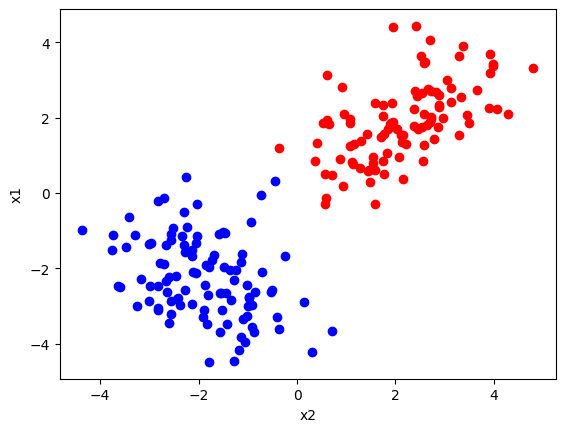

In [129]:
print(f"Distortion: {distortion}")

plt.scatter(X[idx==0][:,0], X[idx==0][:,1], c='red')
plt.scatter(X[idx==1][:,0], X[idx==1][:,1], c='blue')
plt.xlabel("x2")
plt.ylabel("x1")
plt.show()